# **Algoritma ResNet152V2 Dalam Melakukan Klasifikasi Penyakit Pada Daun Tanaman Tomat**

**Abstrak**—Penyakit pada daun tomat merupakan salah satu masalah yang sering dihadapi dalam budidaya tanaman tomat. Identifikasi penyakit pada daun tomat menjadi penting dalam upaya pengendalian penyakit dan perlindungan tanaman. Dalam penelitian ini, digunakan metode pengenalan gambar dengan menggunakan model ResNet152V2. Hasil penelitian ini menunjukkan bahwa metode yang menggunakan ResNet152V2 mampu mencapai tingkat akurasi sebesar 97% dalam mengklasifikasikan penyakit pada daun tomat. Hal ini menunjukkan bahwa penggunaan teknologi kecerdasan buatan seperti ResNet152V2 ini dapat menjadi alat yang efektif dan berpotensi menjadi solusi yang efisien dalam pengendalian penyakit pada tanaman tomat dan mendukung peningkatan produksi tanaman secara berkelanjutan.

**Dicky Setiawan | dickysstwn@gmail.com**

## **Data Load**

Dataset yang digunakan diambil dari Kaggle pada tautan berikut: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Project/Deteksi Penyakit Daun Tomat/Dataset/tomato_data')
print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['val', 'train']


In [ ]:
train = keras.preprocessing.image_dataset_from_directory('./train', label_mode='categorical')
val = keras.preprocessing.image_dataset_from_directory('./val', label_mode='categorical')

Found 1000 files belonging to 10 classes.
Found 250 files belonging to 10 classes.


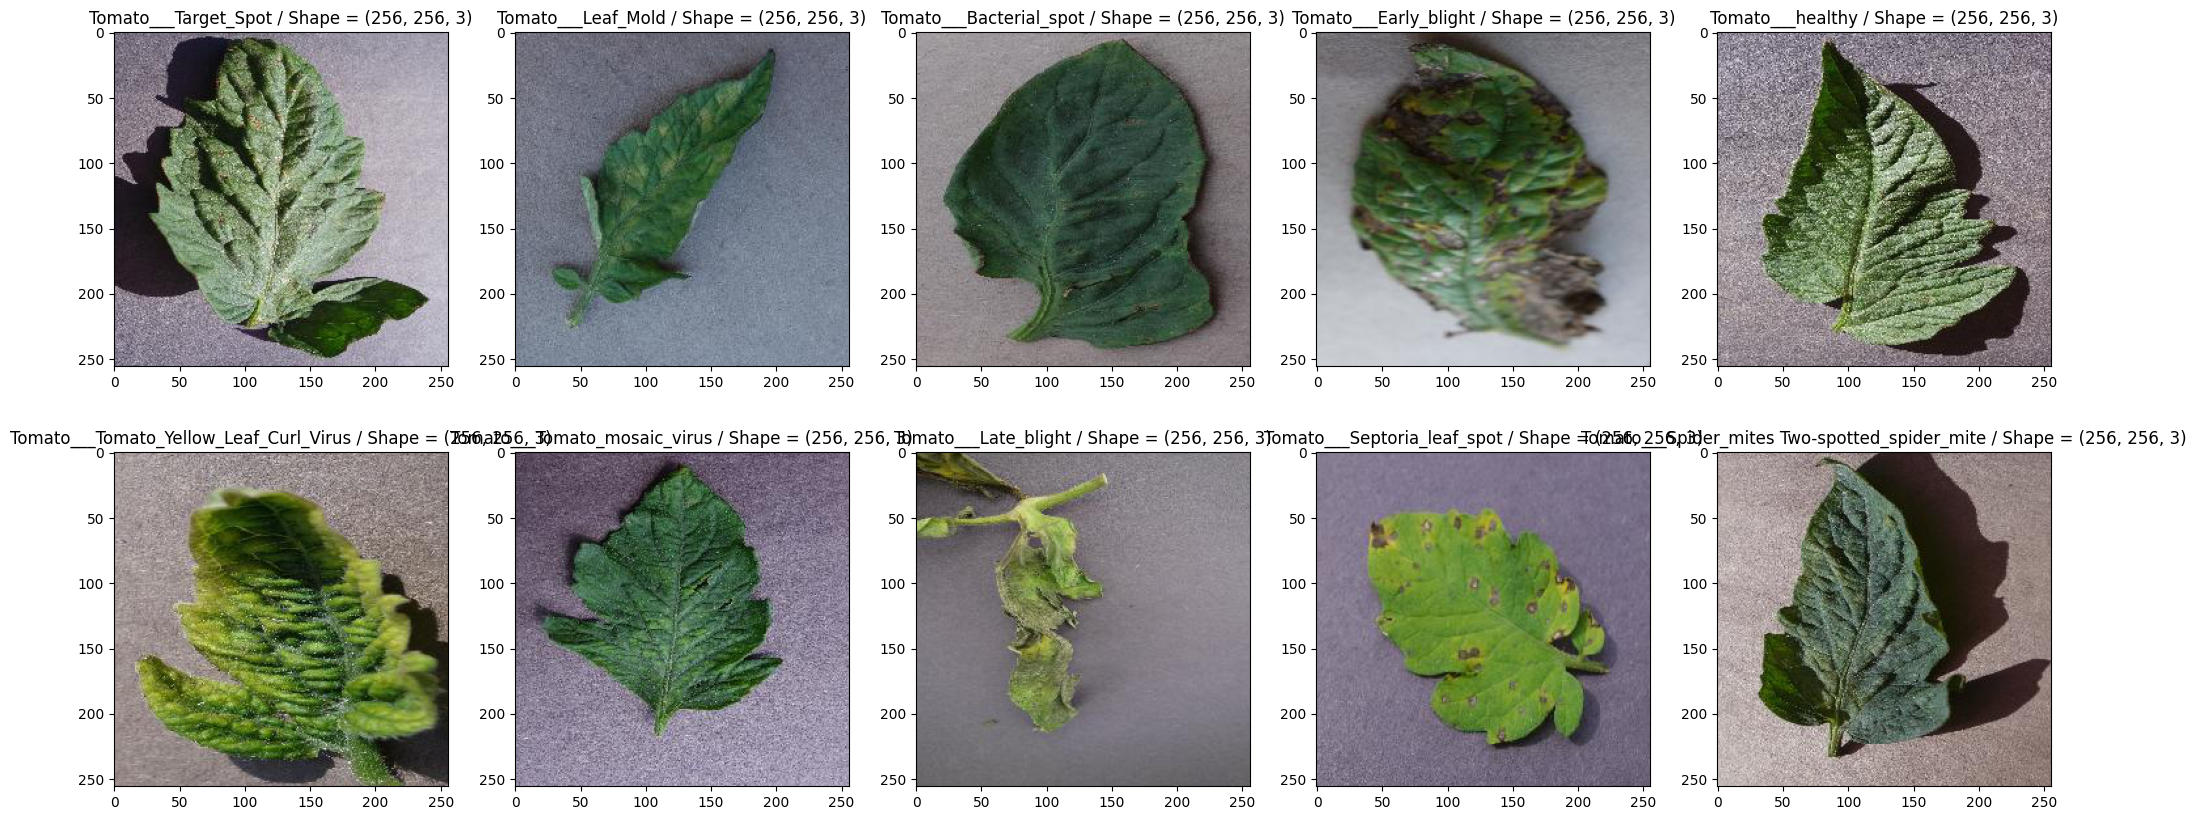

In [ ]:
classes = os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

## **Modelling**

### **Function to Initialize Model (ResNet152V2)**

In [ ]:
def get_model():

    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)

    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=pred)

    return model

### **Model Initialization**

In [ ]:
model = get_model()
model.summary()

234545216/234545216 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

### **Model Training**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
model.fit(train, batch_size=80, epochs=5, validation_data=val)

Epoch 1/5
32/32 [==============================] - 2244s 70s/step - loss: 0.9103 - accuracy: 0.7500 - val_loss: 7.0150 - val_accuracy: 0.1200
Epoch 2/5
32/32 [==============================] - 2213s 69s/step - loss: 0.6154 - accuracy: 0.8520 - val_loss: 3.3966 - val_accuracy: 0.2520
Epoch 3/5
32/32 [==============================] - 2249s 70s/step - loss: 0.4042 - accuracy: 0.9100 - val_loss: 1.5623 - val_accuracy: 0.5520
Epoch 4/5
32/32 [==============================] - 2210s 69s/step - loss: 0.2609 - accuracy: 0.9530 - val_loss: 1.4815 - val_accuracy: 0.5720
Epoch 5/5
32/32 [==============================] - 2236s 70s/step - loss: 0.1685 - accuracy: 0.9760 - val_loss: 0.9609 - val_accuracy: 0.7040


## **Prediction (Testing) and Visualizations**

1/1 [==============================] - 1s 614ms/step


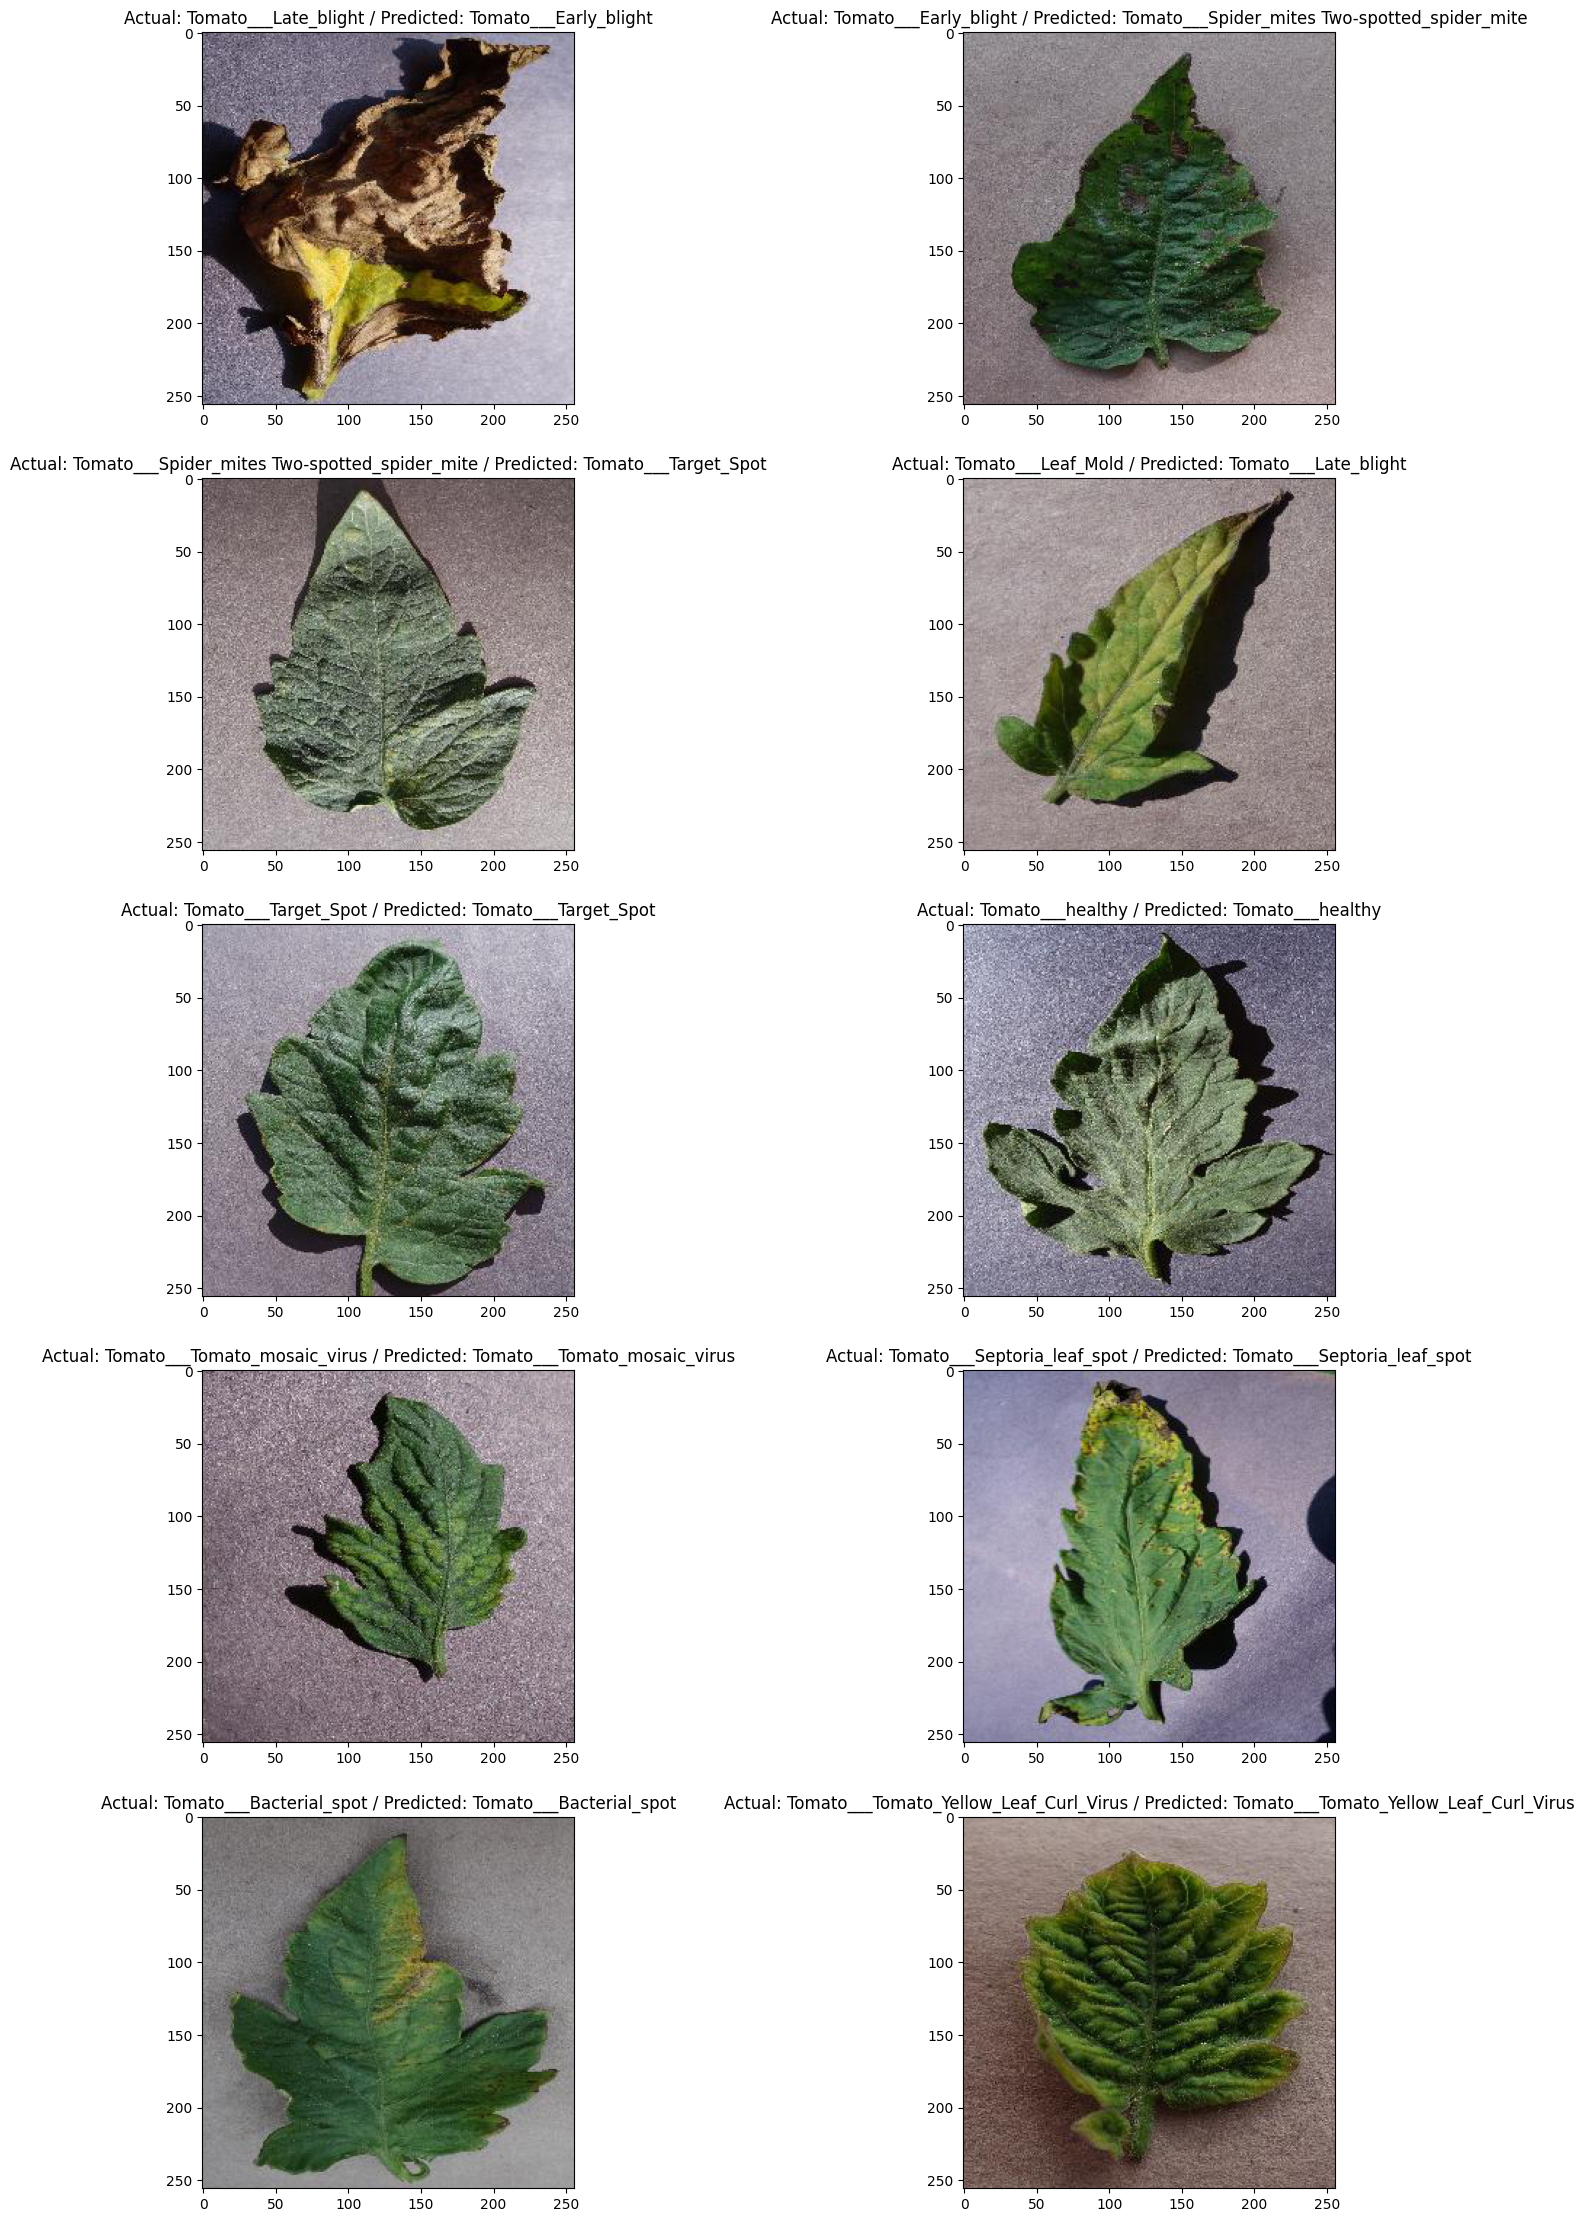

In [ ]:
classes = os.listdir('./val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):
    pic = os.listdir('./val/'+i[1])
    pic = pic[np.random.randint(len(pic)-1)]
    image = Image.open('./val/'+i[1]+'/'+pic)
    image = np.asarray(image)

    pred = np.argmax(model.predict(image.reshape(-1,256,256,3)))
    for j in list(enumerate(train.class_names)):
        if pred == j[0]:
            prediction =  j[1]

    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(image)
plt.show()

1/1 [==============================] - 1s 597ms/step


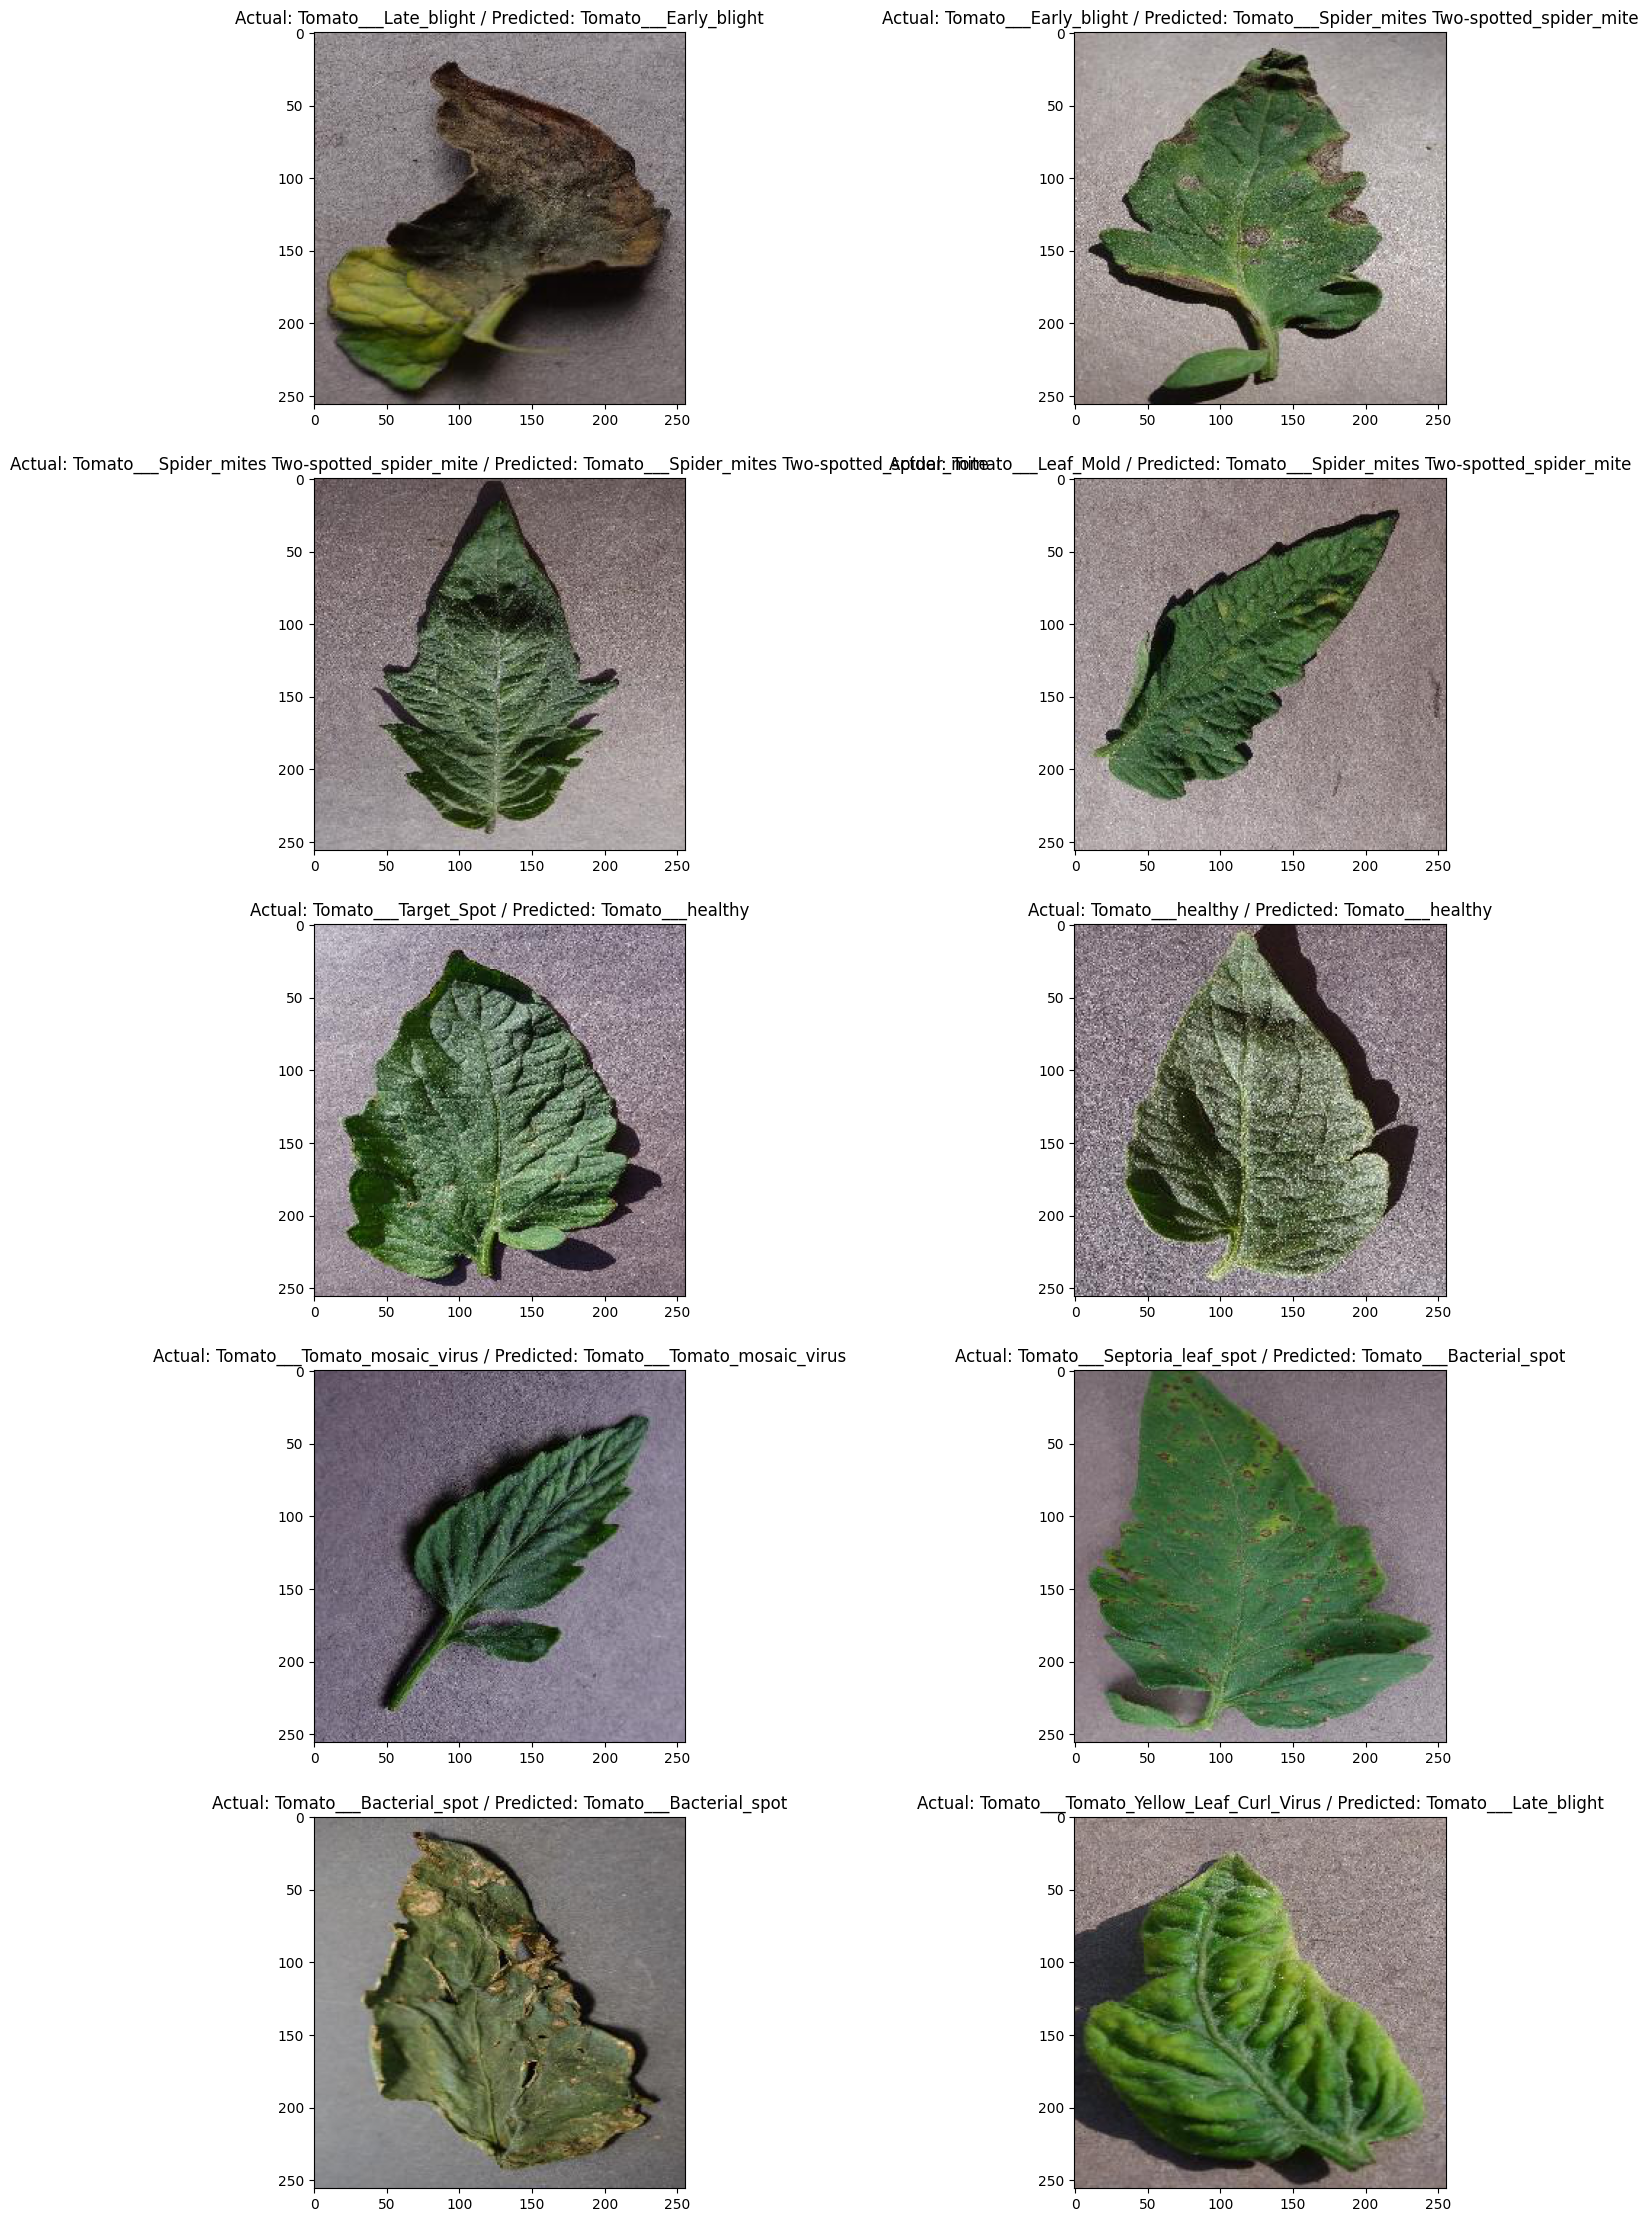

In [ ]:
classes = os.listdir('./val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):
    pic = os.listdir('./val/'+i[1])
    pic = pic[np.random.randint(len(pic)-1)]
    image = Image.open('./val/'+i[1]+'/'+pic)
    image = np.asarray(image)

    pred = np.argmax(model.predict(image.reshape(-1,256,256,3)))
    for j in list(enumerate(train.class_names)):
        if pred == j[0]:
            prediction =  j[1]

    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(image)
plt.show()

## **Saving Model to H5**

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def save_model_with_name(model, filename):
    model.save(filename)

def get_model():
    base_model = ResNet152V2(input_shape=(256, 256, 3), include_top=False)

    for layer in base_model.layers[:140]:
        layer.trainable = False
    for layer in base_model.layers[140:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=pred)
    return model

model = get_model()

filename = "/content/drive/MyDrive/Project/Deteksi Penyakit Daun Tomat/Model/resnet152v2_tomato.h5"
save_model_with_name(model, filename)